## Creating helpful alerts

In this section we're going build! You've got all our data cleaned and processed. Now it's time to start making it work for you. In this notebook we'll put together a very simple alerts function that you can customised all day long.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #importing matplotlib library
%matplotlib inline

In [2]:
ga_page_traffic_data = pd.read_csv('data/ga_data/ga_pages.csv', 
                                   skiprows=386, nrows=366, 
                                   usecols=['Day Index', 'Pageviews'], 
                                   parse_dates=['Day Index'],
                                   index_col='Day Index')

In [3]:
ga_page_traffic_data.head()

,Pageviews
Day Index,
2018-08-31,14
2018-09-01,6
2018-09-02,17
2018-09-03,14
2018-09-04,11


In [4]:
ga_page_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2018-08-31 to 2019-08-31
Data columns (total 1 columns):
Pageviews    366 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


## Creating an alert for loop

In this viseo we'll look at creating an alert that signals whether a number is positive, negative or no change.

In [9]:
#Create a variable called num and assign it a integer 
num = -1

In [10]:
#Write an if statement that prints if the number is up, down or no change
if num > 0:
    print("It's UP!")
    
elif num == 0:
    print("No Change")
else:
    print("It's DOWN!")

It's DOWN!


## Filter by date range and get the difference

We're goign to create a way of filtering our data by date range. To do this we need a start and end date.

In [11]:
start = '2018-08-31'
end = '2018-09-30'

In [12]:
#Create a mask that will select two dates. A mask will return a boolean (True/False) array 
mask = ((ga_page_traffic_data.index == start) | (ga_page_traffic_data.index == end))
mask[:30]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
#Apply the mask to the dataframe
ga_page_traffic_data[mask]

,Pageviews
Day Index,
2018-08-31,14
2018-09-30,2


In [14]:
#Now we want to calculate the difference between the two rows and select the number
diff = ga_page_traffic_data[mask].diff().max()[0]

In [15]:
diff

-12.0

In [18]:
ga_page_traffic_data[mask].diff().max()[0]

-12.0

## Create an Alert!

Now that we can select data and check the differene between two rows it's possible to create an alert that will get us the data we need if something has went wrong.

In [19]:
start = '2018-08-31'
end = '2018-09-30'

def alerts(df, start, end):
    mask = ((df.index == start) | (df.index == end)) #Create a mask
    diff = df[mask].diff().max()[0] #select the difference between the two dates
    chart = df[mask] #create a df with the mask applied
    if diff > 0:
        print("Traffic is up by {}".format(diff)) #print if traffic is above 0
    
    elif diff == 0:
        print("No Change") #print if traffic is unchanged
        
    else:
        print("Traffic is down by {}".format(diff))  #print if traffic is below 0
        
        #Print a bar chart to show the troublesome data
        fig = plt.figure(figsize=(15,5))

        ax = fig.add_subplot(111)

        figsize = (15,8)

        chart.plot(kind='bar',
                  figsize=figsize,
                  linewidth=0.5,
                  ax=ax
                 )

        #Global Plot settings
        plt.title('{} - {} : Traffic Drop in {}'.format(start,
                                                        end,
                                                        df.columns.values)) # set chart name

        #display the charts
        plt.show()         
    

Traffic is down by -12.0


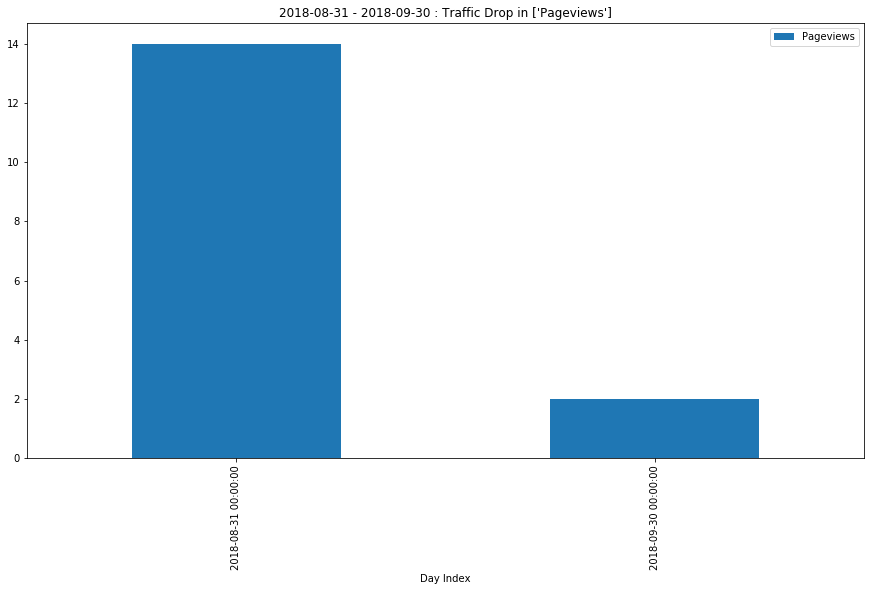

In [20]:
#Run the function
alerts(ga_page_traffic_data, start, end)